# Project: House Prices - Advanced Regression Techniques

## EDA

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# plotting with pyplot
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

# plotting with seaborn
import seaborn as sns

# Pretty display for notebooks
%matplotlib inline

### Benchmark Model

In [2]:
# Load the public leaderboard dataset
public_leaderboard = pd.read_csv('data/house_prices/public_leaderboard.csv')

In [3]:
# Describe the public leaderboard dataset
public_leaderboard.describe()

,﻿TeamId,Score
count,11730.000000,11730.000000
mean,403523.006223,0.328228
std,25732.319414,4.728413
min,365125.000000,0.038390
25%,378298.000000,0.124012
50%,403179.000000,0.140710
75%,428359.000000,0.177783
max,446160.000000,406.201830


In [4]:
# Calculate the top 20 percentile
# number of teams
teams = len(public_leaderboard.drop_duplicates('TeamName'))

# top 20% teams
top_20 = teams * 0.2
print top_20

# RMSLE value for that top_10
rmsle_top_20 = public_leaderboard['Score'].sort_values().loc[331]
print rmsle_top_20

661.2
0.12503


### Data Exploration

In [2]:
# Load the Ames housing dataset
train = pd.read_csv('data/house_prices/train.csv')
test = pd.read_csv('data/house_prices/test.csv')

#### Training and testing dataset

In [6]:
# Size of the dataset
print "Ames housing train dataset has {} data points with {} variables each.".format(*train.shape)
print "Ames housing test dataset has {} data points with {} variables each.".format(*test.shape)

Ames housing train dataset has 1460 data points with 81 variables each.
Ames housing test dataset has 1459 data points with 80 variables each.


#### Statistical Analysis

In [7]:
display(train.describe())

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,74.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,98.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,168.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
display(test.describe())

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,60.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,72.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,351.000000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,92.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,172.000000,755.000000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [9]:
display(train[['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','FullBath','TotRmsAbvGrd','YearBuilt','YearRemodAdd', 'SalePrice']].describe())

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,6.099315,1515.463699,1.767123,472.980137,1057.429452,1162.626712,1.565068,6.517808,1971.267808,1984.865753,180921.195890
std,1.382997,525.480383,0.747315,213.804841,438.705324,386.587738,0.550916,1.625393,30.202904,20.645407,79442.502883
min,1.000000,334.000000,0.000000,0.000000,0.000000,334.000000,0.000000,2.000000,1872.000000,1950.000000,34900.000000
25%,5.000000,1129.500000,1.000000,334.500000,795.750000,882.000000,1.000000,5.000000,1954.000000,1967.000000,129975.000000
50%,6.000000,1464.000000,2.000000,480.000000,991.500000,1087.000000,2.000000,6.000000,1973.000000,1994.000000,163000.000000
75%,7.000000,1776.750000,2.000000,576.000000,1298.250000,1391.250000,2.000000,7.000000,2000.000000,2004.000000,214000.000000
max,10.000000,5642.000000,4.000000,1418.000000,6110.000000,4692.000000,3.000000,14.000000,2010.000000,2010.000000,755000.000000


In [10]:
display(test[['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','FullBath','TotRmsAbvGrd','YearBuilt','YearRemodAdd']].describe())

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd
count,1459.000000,1459.000000,1458.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,6.078821,1486.045922,1.766118,472.768861,1046.117970,1156.534613,1.570939,6.385195,1971.357779,1983.662783
std,1.436812,485.566099,0.775945,217.048611,442.898624,398.165820,0.555190,1.508895,30.390071,21.130467
min,1.000000,407.000000,0.000000,0.000000,0.000000,407.000000,0.000000,3.000000,1879.000000,1950.000000
25%,5.000000,1117.500000,1.000000,318.000000,784.000000,873.500000,1.000000,5.000000,1953.000000,1963.000000
50%,6.000000,1432.000000,2.000000,480.000000,988.000000,1079.000000,2.000000,6.000000,1973.000000,1992.000000
75%,7.000000,1721.000000,2.000000,576.000000,1307.000000,1382.500000,2.000000,7.000000,2001.000000,2004.000000
max,10.000000,5095.000000,5.000000,1488.000000,5095.000000,5095.000000,4.000000,15.000000,2010.000000,2010.000000


#### null values

In [11]:
# return all entries with null values via loc by index
idx = train['LotFrontage'].isnull()
train.loc[idx, 'LotFrontage'].head()

7    NaN
12   NaN
14   NaN
16   NaN
24   NaN
Name: LotFrontage, dtype: float64

In [3]:
# null values in train set
features = []
null_values = []
for feature in train:
    sum_null = train[feature].isnull().sum().sum()
    print 'Feature {} has {} null values'.format(feature, sum_null)
    if sum_null:
        features.append(feature)
        null_values.append(sum_null)
        
null_values_train_set = {'null_values': pd.Series(null_values), 'features': pd.Series(features)
                }

Feature Id has 0 null values
Feature MSSubClass has 0 null values
Feature MSZoning has 0 null values
Feature LotFrontage has 259 null values
Feature LotArea has 0 null values
Feature Street has 0 null values
Feature Alley has 1369 null values
Feature LotShape has 0 null values
Feature LandContour has 0 null values
Feature Utilities has 0 null values
Feature LotConfig has 0 null values
Feature LandSlope has 0 null values
Feature Neighborhood has 0 null values
Feature Condition1 has 0 null values
Feature Condition2 has 0 null values
Feature BldgType has 0 null values
Feature HouseStyle has 0 null values
Feature OverallQual has 0 null values
Feature OverallCond has 0 null values
Feature YearBuilt has 0 null values
Feature YearRemodAdd has 0 null values
Feature RoofStyle has 0 null values
Feature RoofMatl has 0 null values
Feature Exterior1st has 0 null values
Feature Exterior2nd has 0 null values
Feature MasVnrType has 8 null values
Feature MasVnrArea has 8 null values
Feature ExterQual h

In [4]:
null_values_train_set_df = pd.DataFrame.from_dict(null_values_train_set).sort_values(by='null_values', ascending = False)
print null_values_train_set_df

        features  null_values
16        PoolQC         1453
18   MiscFeature         1406
1          Alley         1369
17         Fence         1179
10   FireplaceQu          690
0    LotFrontage          259
11    GarageType           81
12   GarageYrBlt           81
13  GarageFinish           81
14    GarageQual           81
15    GarageCond           81
6   BsmtExposure           38
8   BsmtFinType2           38
7   BsmtFinType1           37
5       BsmtCond           37
4       BsmtQual           37
3     MasVnrArea            8
2     MasVnrType            8
9     Electrical            1


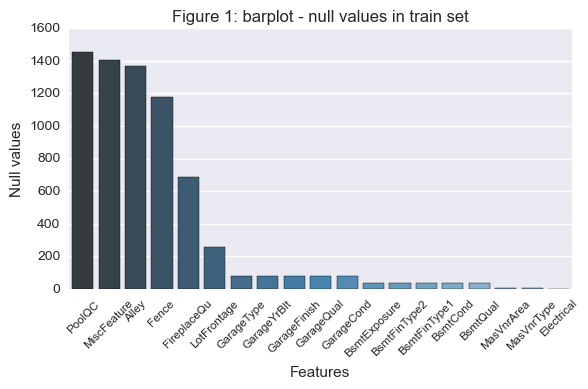

In [9]:
# null values train set barplot

# plotting without 'LotArea' and 'SalePrice'
fig, ax = plt.subplots()
# Rotate x labels
ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45, size='small')
ax = sns.barplot(x='features', y='null_values', data=null_values_train_set_df, palette='Blues_d')
# Set title
plt.title('Figure 1: barplot - null values in train set')
# Set labels
ax.set_xlabel('Features')
ax.set_ylabel('Null values')
plt.tight_layout()

In [5]:
# null values in train set
features = []
null_values = []
for feature in test:
    sum_null = test[feature].isnull().sum().sum()
    print 'Feature {} has {} null values'.format(feature, sum_null)
    if sum_null:
        features.append(feature)
        null_values.append(sum_null)
        
null_values_test_set = {'null_values': pd.Series(null_values), 'features': pd.Series(features)
                }

Feature Id has 0 null values
Feature MSSubClass has 0 null values
Feature MSZoning has 4 null values
Feature LotFrontage has 227 null values
Feature LotArea has 0 null values
Feature Street has 0 null values
Feature Alley has 1352 null values
Feature LotShape has 0 null values
Feature LandContour has 0 null values
Feature Utilities has 2 null values
Feature LotConfig has 0 null values
Feature LandSlope has 0 null values
Feature Neighborhood has 0 null values
Feature Condition1 has 0 null values
Feature Condition2 has 0 null values
Feature BldgType has 0 null values
Feature HouseStyle has 0 null values
Feature OverallQual has 0 null values
Feature OverallCond has 0 null values
Feature YearBuilt has 0 null values
Feature YearRemodAdd has 0 null values
Feature RoofStyle has 0 null values
Feature RoofMatl has 0 null values
Feature Exterior1st has 1 null values
Feature Exterior2nd has 1 null values
Feature MasVnrType has 16 null values
Feature MasVnrArea has 15 null values
Feature ExterQual

In [6]:
null_values_test_set_df = pd.DataFrame.from_dict(null_values_test_set).sort_values(by='null_values', ascending = False)
print null_values_test_set_df

        features  null_values
29        PoolQC         1456
31   MiscFeature         1408
2          Alley         1352
30         Fence         1169
21   FireplaceQu          730
1    LotFrontage          227
28    GarageCond           78
23   GarageYrBlt           78
27    GarageQual           78
24  GarageFinish           78
22    GarageType           76
9       BsmtCond           45
10  BsmtExposure           44
8       BsmtQual           44
11  BsmtFinType1           42
13  BsmtFinType2           42
6     MasVnrType           16
7     MasVnrArea           15
0       MSZoning            4
17  BsmtFullBath            2
18  BsmtHalfBath            2
20    Functional            2
3      Utilities            2
25    GarageCars            1
26    GarageArea            1
16   TotalBsmtSF            1
19   KitchenQual            1
15     BsmtUnfSF            1
14    BsmtFinSF2            1
12    BsmtFinSF1            1
5    Exterior2nd            1
4    Exterior1st            1
32      Sa

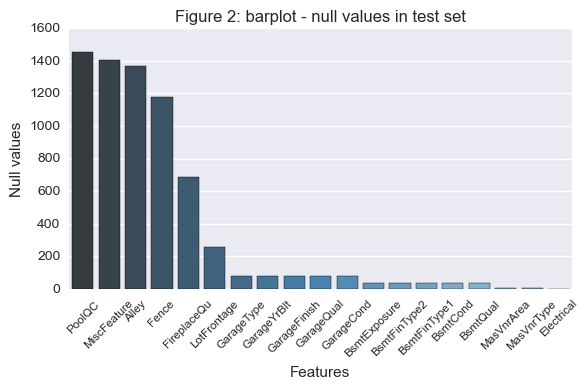

In [8]:
# plotting without 'LotArea' and 'SalePrice'
fig, ax = plt.subplots()
# Rotate x labels
ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45, size='small')
ax = sns.barplot(x='features', y='null_values', data=null_values_train_set_df, palette='Blues_d')
# Set title
plt.title('Figure 2: barplot - null values in test set ')
# Set labels
ax.set_xlabel('Features')
ax.set_ylabel('Null values')
plt.tight_layout()

#### Samples

In [18]:
train.sample(n=2, replace=True, random_state=2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1192,1193,50,RM,60.0,9600,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,7,2007,WD,Normal,125000
527,528,60,RL,67.0,14948,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2008,New,Partial,446261


In [19]:
test.sample(n=2, replace=True, random_state=2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1192,2653,20,RL,110.0,16163,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal
527,1988,60,RL,80.0,9024,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,7,2008,WD,Normal


#### Correlation

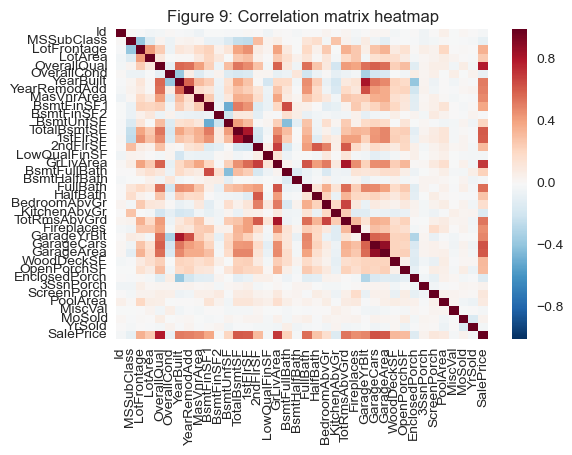

In [8]:
# correlation heatmap
plt.title('Figure 9: Correlation matrix heatmap')
sns.heatmap(train.corr())

# Remove the upper triangle of matrix
# corr = train.corr()
# mask = np.zeros_like(corr)
# mask[np.triu_indices_from(mask)] = True
# with sns.axes_style("white"):
#     ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True)
# plt.savefig("correlation_continuous_features.png")

##### Most corralated features

In [21]:
corr = train.corr()['SalePrice'].sort_values(ascending = False)
print corr

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

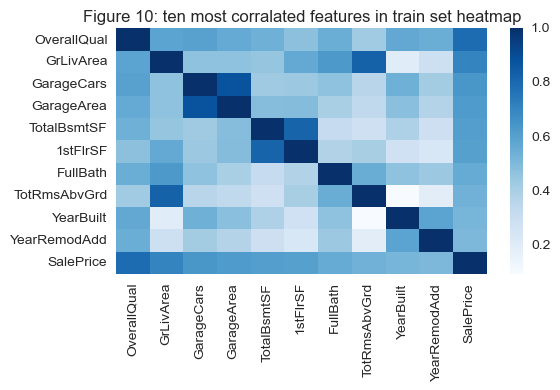

In [18]:
# heatmap of top ten most corralated features in train set
selected_features = train[['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','FullBath','TotRmsAbvGrd','YearBuilt','YearRemodAdd', 'SalePrice']]
corr = selected_features.corr()
fig, ax = plt.subplots()
plt.title('Figure 10: ten most corralated features in train set heatmap')
ax = sns.heatmap(corr, cmap="Blues")
plt.tight_layout()

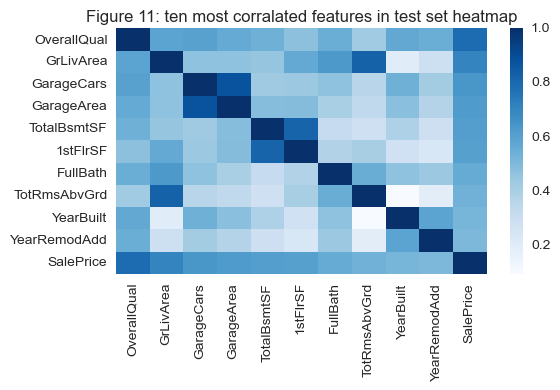

In [19]:
# heatmap of top ten most corralated features in test set
selected_features = train[['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','FullBath','TotRmsAbvGrd','YearBuilt','YearRemodAdd', 'SalePrice']]
corr = selected_features.corr()
fig, ax = plt.subplots()
plt.title('Figure 11: ten most corralated features in test set heatmap')
ax = sns.heatmap(corr, cmap="Blues")
plt.tight_layout()

#### Statistical analysis of selected features

In [10]:
# selected features
selected_features = train[['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1','BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice']]

In [25]:
# data ordered by the mean
display(selected_features.mean().sort_values(ascending = False))

SalePrice        180921.195890
LotArea           10516.828082
GrLivArea          1515.463699
1stFlrSF           1162.626712
TotalBsmtSF        1057.429452
BsmtUnfSF           567.240411
GarageArea          472.980137
BsmtFinSF1          443.639726
2ndFlrSF            346.992466
MasVnrArea          103.685262
WoodDeckSF           94.244521
LotFrontage          70.049958
OpenPorchSF          46.660274
BsmtFinSF2           46.549315
MiscVal              43.489041
EnclosedPorch        21.954110
ScreenPorch          15.060959
LowQualFinSF          5.844521
3SsnPorch             3.409589
PoolArea              2.758904
dtype: float64

##### barplots

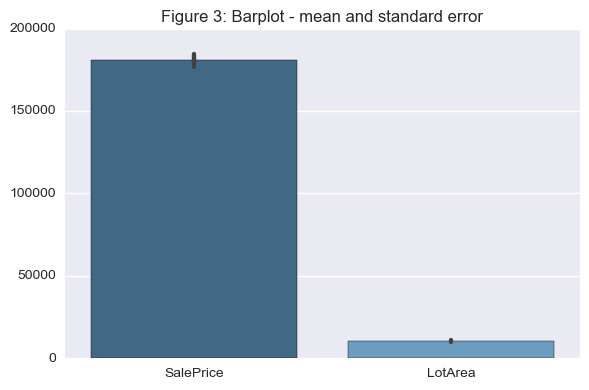

In [17]:
# Mean and standard error sorted
fig, ax = plt.subplots()
plt.title('Figure 3: Barplot - mean and standard error')
ax = sns.barplot(data=selected_features, order=['SalePrice', 'LotArea'], palette='Blues_d')
plt.tight_layout()

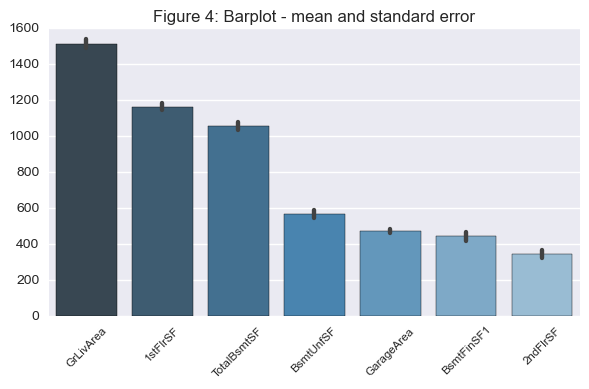

In [16]:
# Mean and standard error sorted
fig, ax = plt.subplots()
plt.title('Figure 4: Barplot - mean and standard error')
# Rotate x labels
ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45, size='small')
ax = sns.barplot(data=selected_features, order=['GrLivArea', '1stFlrSF', 'TotalBsmtSF', 'BsmtUnfSF', 'GarageArea', 'BsmtFinSF1', '2ndFlrSF'], palette='Blues_d')
plt.tight_layout()

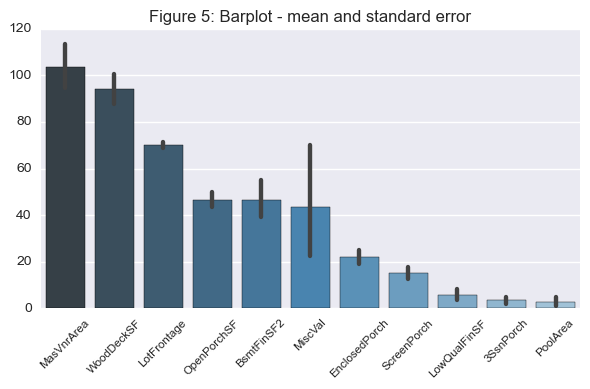

In [18]:
# Mean and standard error sorted
fig, ax = plt.subplots()
plt.title('Figure 5: Barplot - mean and standard error')
# Rotate x labels
ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45, size='small')
ax = sns.barplot(data=selected_features, order=['MasVnrArea', 'WoodDeckSF', 'LotFrontage', 'OpenPorchSF', 'BsmtFinSF2', 'MiscVal', 'EnclosedPorch', 'ScreenPorch', 'LowQualFinSF', '3SsnPorch', 'PoolArea'], palette='Blues_d')
plt.tight_layout()

##### horizontal box plots

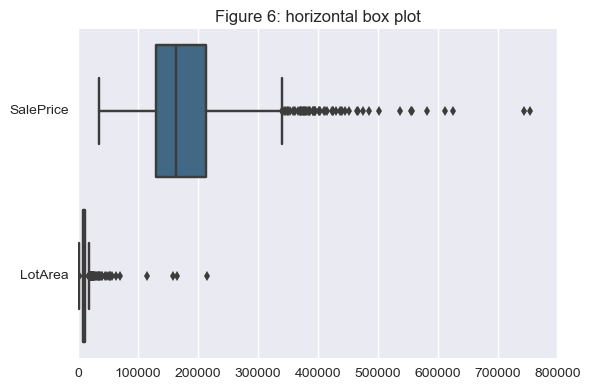

In [19]:
# horizontal box plot
ax = sns.boxplot(data=selected_features, order=['SalePrice', 'LotArea'], orient='h', palette='Blues_d')
plt.title('Figure 6: horizontal box plot')
plt.tight_layout()

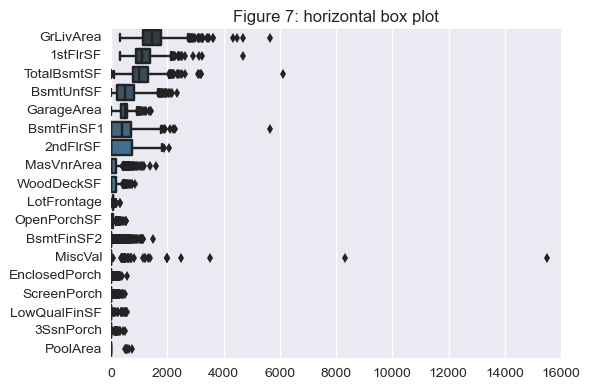

In [20]:
# horizontal box plot
ax = sns.boxplot(data=selected_features, order=['GrLivArea', '1stFlrSF', 'TotalBsmtSF', 'BsmtUnfSF', 'GarageArea', 'BsmtFinSF1', '2ndFlrSF', 'MasVnrArea', 'WoodDeckSF', 'LotFrontage', 'OpenPorchSF', 'BsmtFinSF2', 'MiscVal', 'EnclosedPorch', 'ScreenPorch', 'LowQualFinSF', '3SsnPorch', 'PoolArea'], orient='h', palette='Blues_d')
plt.title('Figure 7: horizontal box plot')
plt.tight_layout()

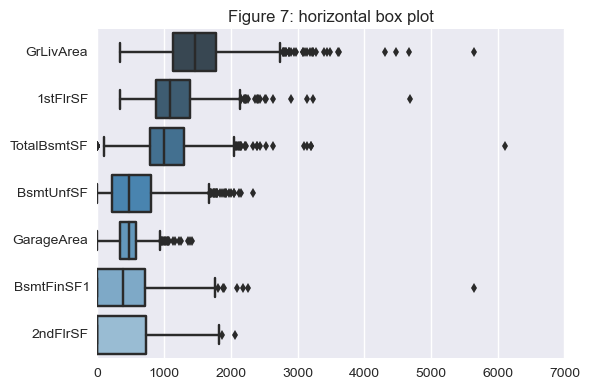

In [24]:
# horizontal box plot
ax = sns.boxplot(data=selected_features, order=['GrLivArea', '1stFlrSF', 'TotalBsmtSF', 'BsmtUnfSF', 'GarageArea', 'BsmtFinSF1', '2ndFlrSF'], orient='h', palette='Blues_d')
plt.title('Figure 7: horizontal box plot')
plt.tight_layout()

In [32]:
selected_features[selected_features['GrLivArea'] > 4000].head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
523,130.0,40094,762.0,2260,0,878,3138,3138,1538,0,4676,884,208,406,0,0,0,0,0,184750
691,104.0,21535,1170.0,1455,0,989,2444,2444,1872,0,4316,832,382,50,0,0,0,0,0,755000
1182,160.0,15623,0.0,2096,0,300,2396,2411,2065,0,4476,813,171,78,0,0,0,555,0,745000
1298,313.0,63887,796.0,5644,0,466,6110,4692,950,0,5642,1418,214,292,0,0,0,480,0,160000


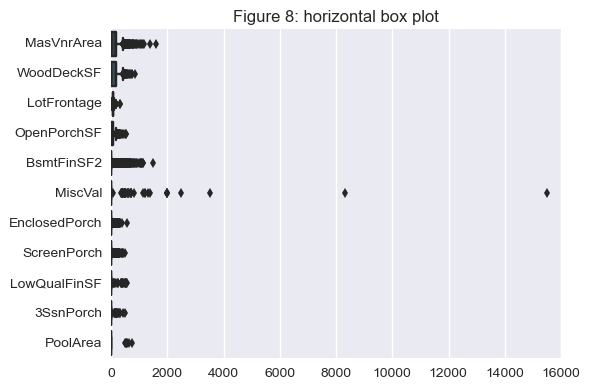

In [23]:
# horizontal box plot
ax = sns.boxplot(data=selected_features, order=['MasVnrArea', 'WoodDeckSF', 'LotFrontage', 'OpenPorchSF', 'BsmtFinSF2', 'MiscVal', 'EnclosedPorch', 'ScreenPorch', 'LowQualFinSF', '3SsnPorch', 'PoolArea'], orient='h', palette='Blues_d')
plt.title('Figure 8: horizontal box plot')
plt.tight_layout()

####  Visualizing feature distribution

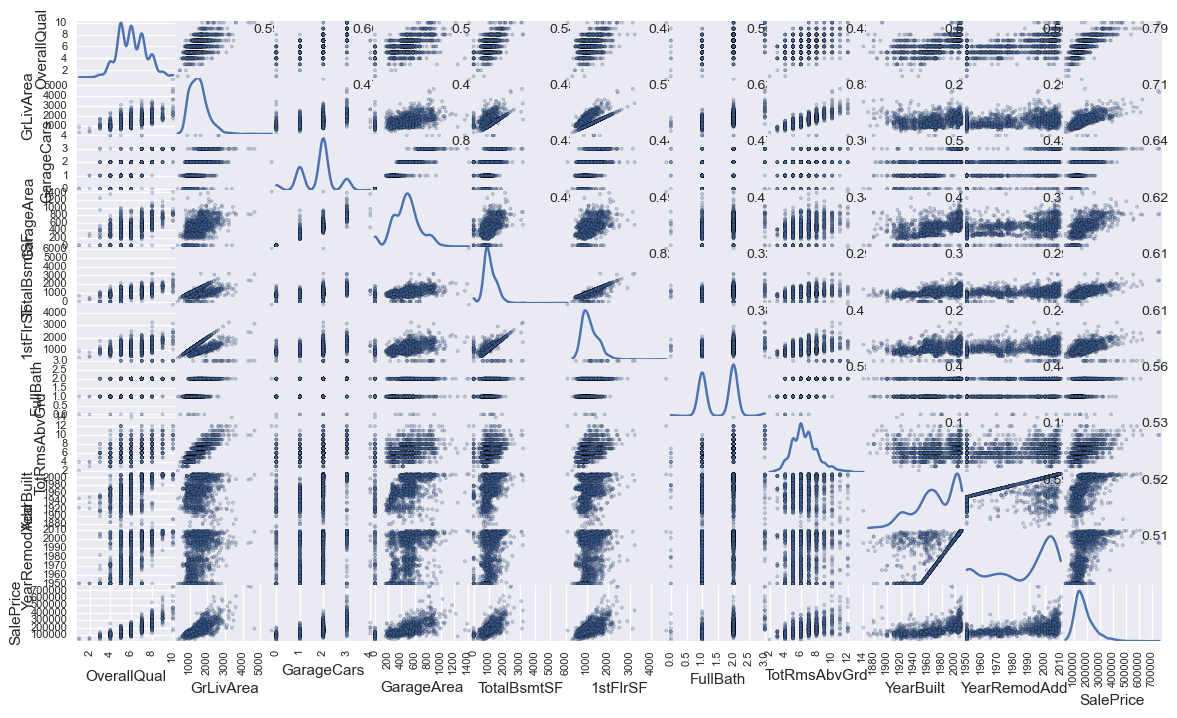

In [23]:
# selected features
selected_features = train[['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','FullBath','TotRmsAbvGrd','YearBuilt','YearRemodAdd', 'SalePrice']]

# Produce a scatter matrix for each pair of features in the data
axes = pd.scatter_matrix(selected_features, alpha = 0.3, figsize = (14,8), diagonal = 'kde')

# Reformat data.corr() for plotting
corr = selected_features.corr().as_matrix()

# Plot scatter matrix with correlations
for i,j in zip(*np.triu_indices_from(axes, k=1)):
    axes[i,j].annotate("%.2f"%corr[i,j], (0.8,0.8), xycoords='axes fraction')
# plt.title('Figure 12: Scatterplot Matrix')
# plt.tight_layout()

##### Further analysis of top two most corralated features

###### 'GrLivArea'

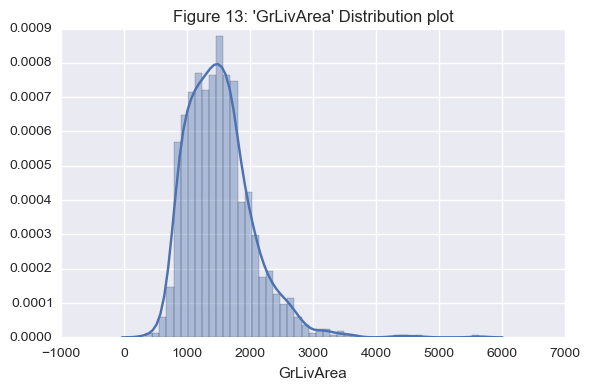

In [35]:
sns.distplot(train['GrLivArea'])
# Set title
plt.title("Figure 13: 'GrLivArea' Distribution plot")
plt.tight_layout()

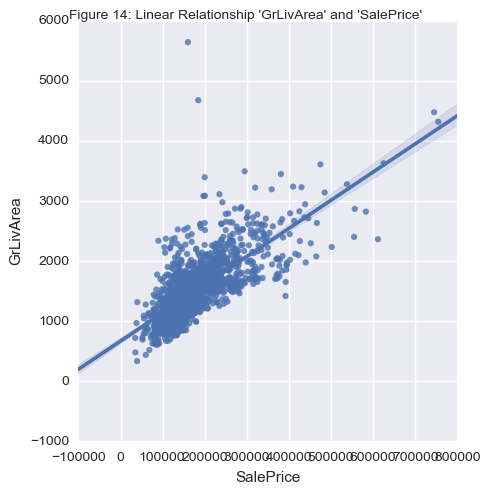

In [42]:
# Visualizing linear relationships
ax = sns.lmplot(data=train, x='SalePrice', y='GrLivArea')
ax.fig.suptitle("Figure 14: Linear Relationship 'GrLivArea' and 'SalePrice'")

###### 'GarageArea'

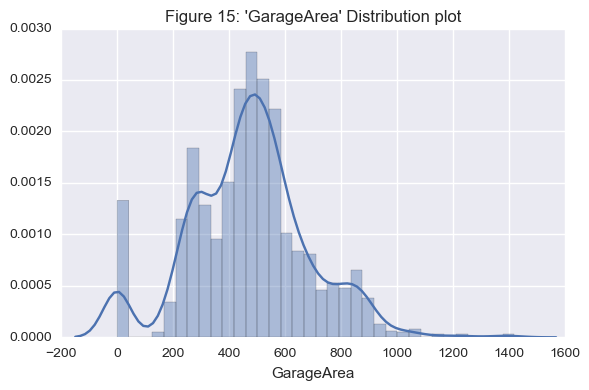

In [34]:
sns.distplot(train['GarageArea'])
# Set title
plt.title("Figure 15: 'GarageArea' Distribution plot")
plt.tight_layout()

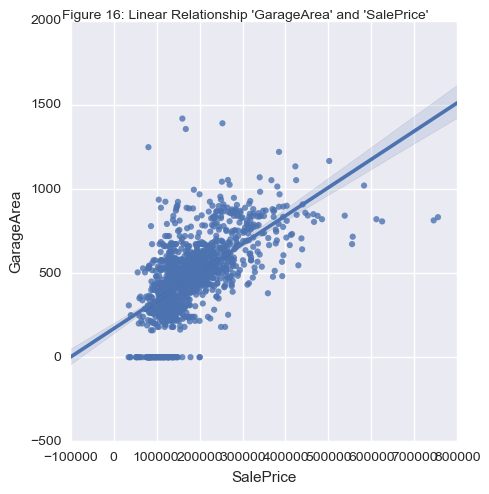

In [44]:
# Visualizing linear relationships
ax = sns.lmplot(data=train, x='SalePrice', y='GarageArea')
ax.fig.suptitle("Figure 16: Linear Relationship 'GarageArea' and 'SalePrice'")

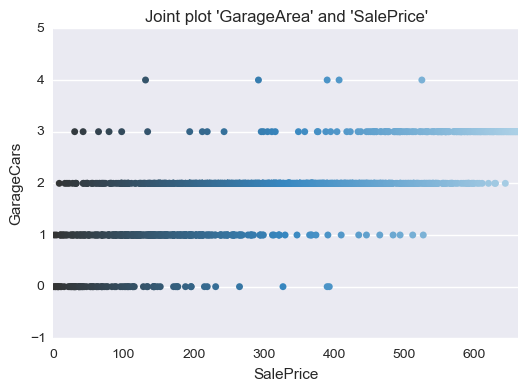

In [39]:
# joint plot 'GarageArea' and 'SalePrice'
import matplotlib.ticker as ticker

fig, ax = plt.subplots()
ax = sns.stripplot(x = "SalePrice", y = "GarageCars", data=train, palette='Blues_d')
# Set title
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=100))
plt.title("Joint plot 'GarageArea' and 'SalePrice'")